In [63]:
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from keras.layers import Dense, Dropout

from matplotlib import pyplot



In [64]:
fdctory='D:\\Shaopeng on machine learning\\Kaggle_Shubo\Data\\fMRI_competition'
os.chdir(fdctory)

with open('features_512.pk', 'rb') as f:
    x = pickle.load(f)

with open('y_train.pk', 'rb') as f:
    y = pickle.load(f)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

val_x, val_x, evl_y, evl_y = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(train_x)
y = sc_y.fit_transform(train_y)
X_test = sc_X.fit_transform(test_x)
y_test = sc_y.fit_transform(test_y)

loading=pd.read_csv('loading.csv')
fnc=pd.read_csv('fnc.csv')
ICN_num=pd.read_csv('ICN_numbers.csv')
ID_site2=pd.read_csv('reveal_ID_site2.csv')
train_scores=pd.read_csv('train_scores.csv')

In [65]:
print(x.shape)
print(y.shape)

(5434, 512)
(3803, 5)


In [66]:
#pd.DataFrame(x).head()

In [67]:
#fnc.head()

In [68]:
#loading.head()

In [69]:
#ICN_num.head()

In [70]:
#ID_site2.head()

In [71]:
train_scores.head()
print(train_scores.shape)

(5877, 6)


In [72]:
from sklearn.impute import SimpleImputer
from numpy import nan
imp = SimpleImputer(missing_values=nan, strategy='mean')

In [73]:
columns=['Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2']
columns

['Age', 'Domain1_val1', 'Domain1_va2', 'Domain2_val1', 'Domain2_val2']

In [74]:
#transformed_values = imp.fit_transform(train_scores)
#transformed_values1=pd.DataFrame(transformed_values, columns=['Id','Age','Domain1_val1','Domain1_va2','Domain2_val1','Domain2_val2'])
#transformed_values1.head()
transformed_values1=train_scores.dropna()
transformed_values1.head()

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421
5,10008,35.326582,15.769168,65.782269,44.643805,50.448485


In [75]:
New_xscale = StandardScaler()

x_New_feature= New_xscale.fit_transform(x)

In [76]:
x3=pd.DataFrame(x_New_feature)
x4=transformed_values1.iloc[:,0]
x4 = x4.reset_index(drop=True)
x5=pd.concat([x4, x3], axis=1)
x5.head()

,Id,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,10001,0.689350,1.047791,0.250876,-1.108774,-1.470739,-1.899021,-1.344004,-1.764143,0.829344,...,-1.595399,-0.365500,1.495144,0.576429,-0.669559,-2.192226,-1.709847,1.166865,-1.512793,-1.553842
1,10002,-0.397649,-1.677634,-0.863750,-0.274403,0.049884,-0.244480,0.057142,0.925306,-0.000715,...,-0.977900,0.575203,0.579285,0.339542,-0.916411,-0.252816,-1.054401,-1.410270,-1.079351,-0.440569
2,10004,-0.264420,-0.643290,-1.677961,0.672147,1.163114,0.792466,1.307046,2.132082,0.101778,...,1.231765,0.842692,-1.791988,2.163927,0.642589,0.765724,-0.086653,-1.369718,1.189625,0.428687
3,10007,-0.546181,0.278521,0.401146,0.199421,0.411542,-0.442430,-0.668121,0.050118,-1.277449,...,-1.450621,0.110767,0.812213,-0.949028,-0.701291,-0.688176,-1.108553,0.441039,-0.367912,-0.597431
4,10008,-1.258323,-0.302318,-0.574248,-1.015426,-0.443411,-0.034011,-0.483446,0.080259,1.145366,...,-0.047452,0.855535,-0.298537,0.540159,0.595061,-0.879030,-0.360270,-0.748934,-0.925188,-0.263193


In [77]:
loading.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.006070,0.014466,0.004136,0.000658,-0.002742,0.005033,0.016720,0.003484,0.001797,...,0.018246,0.023711,0.009177,-0.013929,0.030696,0.010496,0.002892,-0.023235,0.022177,0.017192
1,10002,0.009087,0.009291,0.007049,-0.002076,-0.002227,0.004605,0.012277,0.002946,0.004086,...,0.014635,0.022556,0.012004,-0.011814,0.022479,0.005739,0.002880,-0.016609,0.025543,0.014524
2,10003,0.008151,0.014684,0.010444,-0.005293,-0.002913,0.015042,0.017745,0.003930,-0.008021,...,0.019565,0.030616,0.018184,-0.010469,0.029799,0.015435,0.005211,-0.028882,0.031427,0.018164
3,10004,0.004675,0.000957,0.006154,-0.000429,-0.001222,0.011755,0.013010,0.000193,0.008075,...,0.002658,0.022266,0.005956,-0.010595,0.024078,-0.000319,0.005866,-0.015182,0.024476,0.014760
4,10005,-0.000398,0.006878,0.009051,0.000369,0.000336,0.010679,0.010352,0.003637,0.004180,...,0.009702,0.017257,0.005454,-0.008591,0.019416,0.000786,0.002692,-0.019814,0.017105,0.013316


In [78]:
sc_loading = StandardScaler()
#sc_fnc = StandardScaler()
loading1=loading.iloc[:,1:]
loading1 = sc_loading.fit_transform(loading1)
loading.iloc[:,1:]=loading1

In [79]:
loading.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,IC_08,IC_03,IC_21,IC_28,IC_11,IC_20,IC_30,IC_22,IC_29,IC_14
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,2.097480,0.802459,-0.125210,-1.789838,1.590913,1.463663,-0.246917,-1.424320,-1.100899,0.269423
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,1.174941,0.476319,0.488228,-1.142483,-0.203899,0.177168,-0.251203,-0.314742,-0.267403,-0.445688
2,10003,0.599321,1.308355,-0.052862,-1.767802,-0.617709,0.404866,1.023389,0.606809,-2.468915,...,2.434458,2.752236,1.829101,-0.730808,1.394985,2.799491,0.567749,-2.369957,1.189607,0.529951
3,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,-1.885070,0.394432,-0.823940,-0.769374,0.145365,-1.461421,0.797836,-0.075779,-0.531615,-0.382432
4,10005,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,...,-0.085214,-1.019969,-0.932858,-0.155902,-0.872940,-1.162611,-0.317429,-0.851446,-2.356839,-0.769471


In [80]:
sc_fnc = StandardScaler()
fnc1=fnc.iloc[:,1:]
fnc1 = sc_fnc.fit_transform(fnc1)
fnc.iloc[:,1:]=fnc1

In [81]:
fnc.head()

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.645602,-0.163514,-0.547659,-0.988793,0.160259,0.861182,1.435172,-0.028955,-0.570876,...,-0.367106,1.276582,0.347779,0.494204,-0.380967,-2.145727,-1.170524,-1.015184,-0.784710,-0.047986
1,10002,-0.505381,-1.165881,-2.023649,-0.477589,-0.050424,0.246167,0.088268,0.255368,0.223559,...,-0.710168,-2.029491,0.430029,-2.518197,0.148654,0.525164,0.893950,-0.569832,0.562237,-0.297973
2,10003,0.512051,-0.461052,1.482552,0.586991,-2.359742,-1.780776,-0.682718,-1.059483,-1.080492,...,-0.397016,-1.044071,-0.706524,-0.639991,1.067635,0.334236,0.767976,1.473681,-0.058224,-0.083648
3,10004,-0.605697,0.314304,-0.195647,-0.977448,1.586131,1.181188,0.967005,0.720589,0.895803,...,-0.267046,-0.080704,0.419408,-1.252164,-0.639229,-0.736760,-0.319116,-0.650637,0.280948,-1.287983
4,10005,0.238781,0.277694,-0.692670,0.143619,-0.746451,-0.300959,-0.649181,0.774771,0.077524,...,-0.315572,0.395666,-0.274903,1.026770,0.151027,-0.448011,-0.717072,-0.568162,0.894916,-1.249201


In [82]:
df2= pd.merge(loading, fnc, on='Id')
df2.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,-0.367106,1.276582,0.347779,0.494204,-0.380967,-2.145727,-1.170524,-1.015184,-0.784710,-0.047986
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,-0.710168,-2.029491,0.430029,-2.518197,0.148654,0.525164,0.893950,-0.569832,0.562237,-0.297973
2,10003,0.599321,1.308355,-0.052862,-1.767802,-0.617709,0.404866,1.023389,0.606809,-2.468915,...,-0.397016,-1.044071,-0.706524,-0.639991,1.067635,0.334236,0.767976,1.473681,-0.058224,-0.083648
3,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,-0.267046,-0.080704,0.419408,-1.252164,-0.639229,-0.736760,-0.319116,-0.650637,0.280948,-1.287983
4,10005,-1.278926,-0.571276,-0.438932,-0.191001,0.604573,-0.677238,-0.870123,0.515385,-0.164914,...,-0.315572,0.395666,-0.274903,1.026770,0.151027,-0.448011,-0.717072,-0.568162,0.894916,-1.249201


In [83]:
df4= pd.merge(df2, x5, on='Id')
df4.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,502,503,504,505,506,507,508,509,510,511
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,-1.595399,-0.365500,1.495144,0.576429,-0.669559,-2.192226,-1.709847,1.166865,-1.512793,-1.553842
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,-0.977900,0.575203,0.579285,0.339542,-0.916411,-0.252816,-1.054401,-1.410270,-1.079351,-0.440569
2,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,1.231765,0.842692,-1.791988,2.163927,0.642589,0.765724,-0.086653,-1.369718,1.189625,0.428687
3,10007,-0.050843,0.321306,0.422658,-0.549727,-0.370268,-0.494449,0.022719,-0.018563,-0.378084,...,-1.450621,0.110767,0.812213,-0.949028,-0.701291,-0.688176,-1.108553,0.441039,-0.367912,-0.597431
4,10008,0.510075,0.119730,-0.354385,-1.468456,-0.971243,-0.343654,-0.907773,0.285778,-0.789926,...,-0.047452,0.855535,-0.298537,0.540159,0.595061,-0.879030,-0.360270,-0.748934,-0.925188,-0.263193


In [84]:
df3 = pd.merge(df4, transformed_values1, on='Id')
df3.head()

,Id,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,...,507,508,509,510,511,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2
0,10001,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,...,-2.192226,-1.709847,1.166865,-1.512793,-1.553842,57.436077,30.571975,62.553736,53.325130,51.427998
1,10002,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,...,-0.252816,-1.054401,-1.410270,-1.079351,-0.440569,59.580851,50.969456,67.470628,60.651856,58.311361
2,10004,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,...,0.765724,-0.086653,-1.369718,1.189625,0.428687,71.413018,53.152498,58.012103,52.418389,62.536641
3,10007,-0.050843,0.321306,0.422658,-0.549727,-0.370268,-0.494449,0.022719,-0.018563,-0.378084,...,-0.688176,-1.108553,0.441039,-0.367912,-0.597431,38.617381,49.197021,65.674285,40.151376,34.096421
4,10008,0.510075,0.119730,-0.354385,-1.468456,-0.971243,-0.343654,-0.907773,0.285778,-0.789926,...,-0.879030,-0.360270,-0.748934,-0.925188,-0.263193,35.326582,15.769168,65.782269,44.643805,50.448485


In [85]:
y_train_score=df3.iloc[:,-5:]
y_train_score
x_train_score=df3.iloc[:,1:-5]
x_train_score.head()


,IC_01,IC_07,IC_05,IC_16,IC_26,IC_06,IC_10,IC_09,IC_18,IC_04,...,502,503,504,505,506,507,508,509,510,511
0,0.142062,1.255860,-1.800899,-0.110295,-0.553337,-2.077450,0.760863,0.467375,-0.614859,-0.164435,...,-1.595399,-0.365500,1.495144,0.576429,-0.669559,-2.192226,-1.709847,1.166865,-1.512793,-1.553842
1,0.804904,0.009732,-0.993733,-0.871768,-0.359809,-2.183602,-0.377087,0.299186,-0.182571,-0.522889,...,-0.977900,0.575203,0.579285,0.339542,-0.916411,-0.252816,-1.054401,-1.410270,-1.079351,-0.440569
2,-0.164323,-1.997248,-1.241608,-0.413168,0.018330,-0.410371,-0.189350,-0.561193,0.570624,-0.436785,...,1.231765,0.842692,-1.791988,2.163927,0.642589,0.765724,-0.086653,-1.369718,1.189625,0.428687
3,-0.050843,0.321306,0.422658,-0.549727,-0.370268,-0.494449,0.022719,-0.018563,-0.378084,0.337021,...,-1.450621,0.110767,0.812213,-0.949028,-0.701291,-0.688176,-1.108553,0.441039,-0.367912,-0.597431
4,0.510075,0.119730,-0.354385,-1.468456,-0.971243,-0.343654,-0.907773,0.285778,-0.789926,1.443108,...,-0.047452,0.855535,-0.298537,0.540159,0.595061,-0.879030,-0.360270,-0.748934,-0.925188,-0.263193


In [86]:
x_train_score=x_train_score.to_numpy()
y_train_score=y_train_score.to_numpy()

In [87]:
train_score_x, test_score_x, train_score_y, test_score_y = train_test_split(
    x_train_score, y_train_score, test_size = 0.3, random_state = 42
)

In [88]:
test_score_y.shape


(1631, 5)

In [89]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor(n_neighbors=305)))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	level0.append(('Ridge', Ridge()))
	level0.append(('Lasso', Lasso()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor(n_neighbors=305)
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['Ridge'] = Ridge()
	models['Lasso'] = Lasso()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    NewModel = model.fit(train_score_x, y_ID)
    score_kaggle_train = NewModel.predict(train_score_x)
    score_kaggle_train_score=sum(abs((score_kaggle_train-y_ID)))/sum(y_ID)
    score_kaggle_test = NewModel.predict(test_score_x)
    score_kaggle_test_score=sum(abs((score_kaggle_test-y_test_ID)))/sum(y_test_ID)
    print('>Mean train %s Mean train_fit %s Mean test %s Mean test_fit %s' % (mean(y_ID), mean(score_kaggle_train),mean(y_test_ID),mean(score_kaggle_test)))
    print('>Std train %s Std train_fit %s Std test %s Std test_fit %s' % (std(y_ID), std(score_kaggle_train),std(y_test_ID),std(score_kaggle_test)))
    return score_kaggle_train_score, score_kaggle_test_score


In [90]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, results_eval, names = list(), list(), list()
#new_y_score_train = pd.DataFrame()
#new_y_score_test = pd.DataFrame()
for name, model in models.items():
    for ID in [0,1,2,3,4]:
        y_ID=train_score_y[:,ID]
        y_test_ID=test_score_y[:,ID]
        score_kaggle_train_score, score_kaggle_test_score = evaluate_model(model,train_score_x,y_ID,test_score_x, y_test_ID)
        results.append(score_kaggle_train_score)
        #new_y_score_train.append(score_kaggle_train_score)
        results_eval.append(score_kaggle_test_score)
        #new_y_score_test.append(score_kaggle_test_score)
        names.append(name)
        print('>%s Col ID is %s %.3f (%.3f)' % (name, ID,score_kaggle_train_score, score_kaggle_test_score))



>Mean train 49.50170604314499 Mean train_fit 48.421084738533274 Mean test 49.879867326883456 Mean test_fit 48.43672285237436
>Std train 13.530580301520716 Std train_fit 1.5614843506304261 Std test 13.221847270170947 Std test_fit 1.620245617808518
>knn Col ID is 0 0.212 (0.207)
>Mean train 51.36352821004646 Mean train_fit 51.430294914591265 Mean test 51.73304761794175 Mean test_fit 51.41843266201239
>Std train 10.250337469316296 Std train_fit 0.704816543423786 Std test 10.046864879599523 Std test_fit 0.7247459836098911
>knn Col ID is 1 0.158 (0.155)
>Mean train 59.23839980833718 Mean train_fit 59.378442339558724 Mean test 59.26508171626381 Mean test_fit 59.372445056744205
>Std train 11.424914097047246 Std train_fit 0.49118156984806594 Std test 11.29737172602394 Std test_fit 0.4774306852764693
>knn Col ID is 2 0.152 (0.148)
>Mean train 47.10114028501342 Mean train_fit 47.00779664632351 Mean test 47.58032337017948 Mean test_fit 47.01049696514094
>Std train 11.143250146387345 Std train_fit

In [91]:
results=pd.DataFrame(results)
results_eval=pd.DataFrame(results_eval)

In [92]:
K=results.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Train score is %s' % (K))
K=results.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Train score is %s' % (K))
K=results.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Train score is %s' % (K))
K=results.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Train score is %s' % (K))
K=results.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Train score is %s' % (K))
K=results.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Train score is %s' % (K))


K=results_eval.loc[0:4,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('KNN Test score is %s' % (K))
K=results_eval.loc[5:9,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Tree Test score is %s' % (K))
K=results_eval.loc[10:14,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('SVM Test score is %s' % (K))
K=results_eval.loc[15:19,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Ridge Test score is %s' % (K))
K=results_eval.loc[20:24,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Lasso Test score is %s' % (K))
K=results_eval.loc[25:29,:]
K=K.to_numpy()
weight=[0.3,0.175,0.175,0.175,0.175]
weight=np.array(weight)
K=weight.dot(K)
print('Stacking Test score is %s' % (K))

KNN Train score is [0.18138145]
Tree Train score is [1.22855528e-18]
SVM Train score is [0.16266559]
Ridge Train score is [0.1095208]
Lasso Train score is [0.16748026]
Stacking Train score is [0.14959817]
KNN Test score is [0.17821927]
Tree Test score is [0.24139006]
SVM Test score is [0.17200701]
Ridge Test score is [0.21964274]
Lasso Test score is [0.16343373]
Stacking Test score is [0.15899065]


In [93]:
train_result=results.values.tolist()
test_result=results_eval.values.tolist()
type(train_result)

list

{'whiskers': [<matplotlib.lines.Line2D at 0x23f1e34d780>,
 'caps': [<matplotlib.lines.Line2D at 0x23f1e34dda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f1e34d3c8>,
 'medians': [<matplotlib.lines.Line2D at 0x23f1e358400>,
 'fliers': [<matplotlib.lines.Line2D at 0x23f1e344fd0>,
 'means': []}

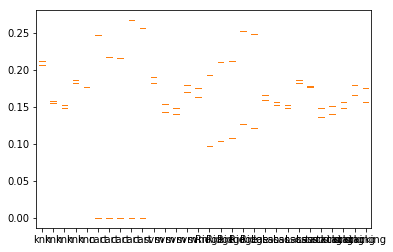

In [94]:
pyplot.boxplot(train_result,labels=names,sym="o")
pyplot.boxplot(test_result,labels=names,sym="s")